# Fashion MNIST

In [1]:
# Installs tensorflow library if there is not at system.
!pip install tensorflow

In [2]:
# Imports general libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Imports the dataset for "fashion_mnist" case study, from "keras_datasets".
# The data are splitted in training (60000 samples) and testing (10000 samples) datasets already.
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# First trainif example.
print(f"Training input:\n{X_train[0]}\n")
print(f"Training target - label:\n{y_train[0]}\n")

Training input:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [5]:
# Checking shapes of training and testing datasets.
print(f"Checking the shape of datasets:\nX_train = {X_train.shape}, y_train = {y_train.shape}\nX_test = {X_test.shape}, y_test = {y_test.shape}\n")

# Checking the shape of single observation.
print(f"Checking the shape of a single observation:\nX_train = {X_train[0].shape},\ny_train = {y_train[0].shape}")

Checking the shape of datasets:
X_train = (60000, 28, 28), y_train = (60000,)
X_test = (10000, 28, 28), y_test = (10000,)

Checking the shape of a single observation:
X_train = (28, 28),
y_train = ()


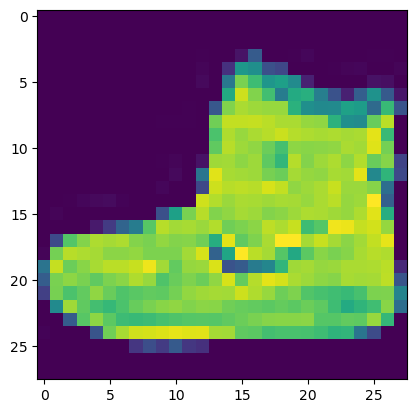

In [6]:
# Plots a single sample.
plt.imshow(X_train[0])

In [7]:
# Creates dataframe with cloth names and corresponding number of label from class evryone belongs.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_labels = np.arange(len(class_names)).tolist()
classes_df = pd.DataFrame(data = {"label": class_labels, "description": class_names})
classes_df

,label,description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


Text(0.5, 1.0, 'T-shirt/top')

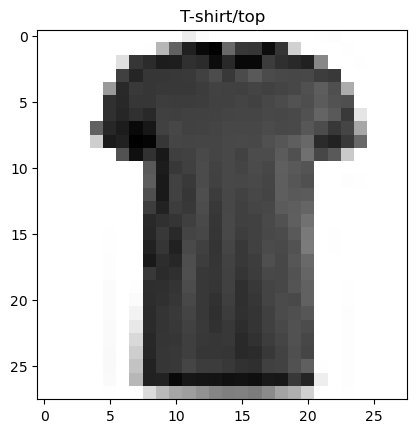

In [8]:
# Plots a random example image and its label.
index_of_random_choice = 17
plt.imshow(X_train[index_of_random_choice], cmap = plt.cm.binary)
plt.title(classes_df["description"][y_train[index_of_random_choice]])

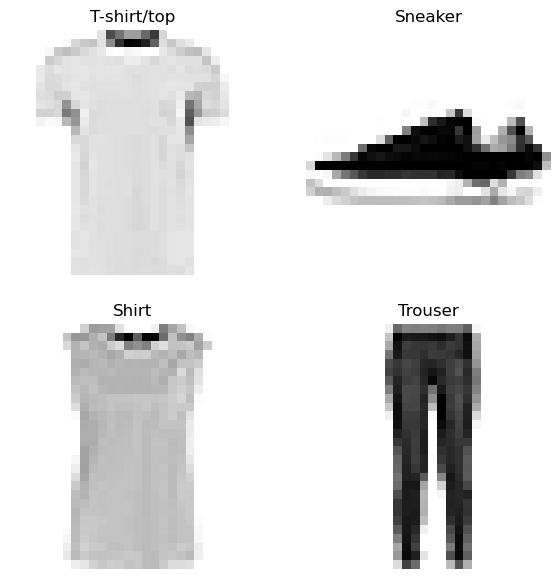

In [9]:
# Plots multiple random images of fashion_MNIST.
import random
plt.figure(figsize = (7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap = plt.cm.binary)
    plt.title(classes_df["description"][y_train[rand_index]])
    plt.axis(False)

## Building the Multiclass Model

### Simulation of data without get normalization.

In [10]:
tf.random.set_seed(0)
ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train[0].shape)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(len(class_labels), activation = "softmax")
])

C:\Users\skyli\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
ann.compile(
    loss = "categorical_crossentropy", 
    optimizer = "adam", 
    metrics = ["accuracy"]
)

In [12]:
non_normalized_history = ann.fit(
    X_train,
    tf.one_hot(y_train, depth = len(class_labels)),
    epochs = 20,
    validation_data = (X_test, tf.one_hot(y_test, depth = len(class_labels))),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 5)],
    verbose = 1
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1004 - loss: 2.4185 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0989 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


In [13]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

### Simulation of normalized data.

In [14]:
# Dividing the train and test datasets of input with 255.0, because interal of numbers describing the color of pixel is from 0 - 255.
# By dividing the numbers with 255.0, normalizing the numbers of inputs between 0 and 1. 
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [15]:
# Sets random seed.
tf.random.set_seed(0)

# Initialises the model. 
ann_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train[0].shape)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(len(class_labels), activation = "softmax")
])

In [16]:
# Adding the loss function, optimizer and the metrics which used for evaluation of result.
ann_2.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [17]:
# Trains the model with normilized datasets.
normalized_history = ann_2.fit(
    X_train_norm, 
    tf.one_hot(y_train, depth = len(class_labels)), 
    epochs = 30,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 5)],
    validation_data = (X_test_norm, tf.one_hot(y_test, depth = len(class_labels))),
    verbose = 1
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2561 - loss: 1.7850 - val_accuracy: 0.4451 - val_loss: 1.3646
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5824 - loss: 1.0662 - val_accuracy: 0.7330 - val_loss: 0.7977
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7493 - loss: 0.7566 - val_accuracy: 0.7573 - val_loss: 0.7165
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.7654 - loss: 0.6911 - val_accuracy: 0.7637 - val_loss: 0.6882
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7724 - loss: 0.6630 - val_accuracy: 0.7694 - val_loss: 0.6724
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7759 - loss: 0.6459 - val_accuracy: 0.7729 - val_loss: 0.6611
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7782 - loss: 0.6349 - val_accuracy: 0.7752 - val_loss: 0.6530
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7803 - loss: 0.6262 

In [18]:
ann_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Compare loss curves of normalized and non-normalized data from models

<Axes: title={'center': 'Normalized data / model loss curve'}>

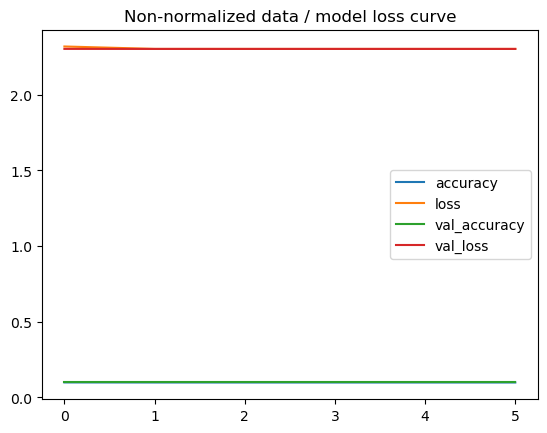

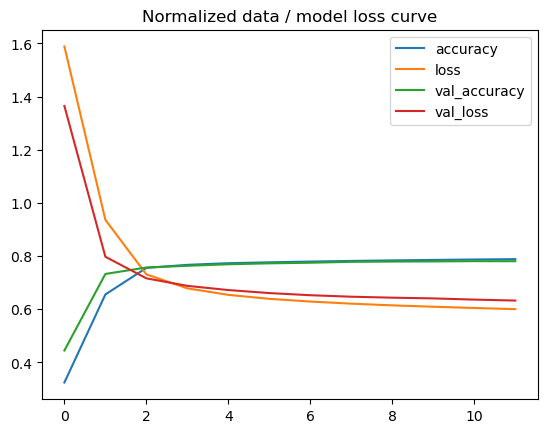

In [19]:
pd.DataFrame(non_normalized_history.history).plot(title = "Non-normalized data / model loss curve")
pd.DataFrame(normalized_history.history).plot(title = "Normalized data / model loss curve")

## Finding the ideal Learning Rate

In [20]:
# Sets random seed.
tf.random.set_seed(0)

# Initialises the model. 
ann_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train[0].shape)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(len(class_labels), activation = "softmax")
])

# Adding the loss function, optimizer and the metrics which used for evaluation of result.
ann_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

# Creates the learning rate callback.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

search_lr_history = ann_3.fit(
    X_train_norm, 
    tf.one_hot(y_train, depth = len(class_labels)), 
    epochs = 40,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 5), lr_scheduler],
    validation_data = (X_test_norm, tf.one_hot(y_test, depth = len(class_labels))),
    verbose = 1
)

Epoch 1/40


C:\Users\skyli\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3875 - loss: 1.5750 - val_accuracy: 0.6325 - val_loss: 1.0461 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6456 - loss: 0.9749 - val_accuracy: 0.6772 - val_loss: 0.8565 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6942 - loss: 0.8199 - val_accuracy: 0.6928 - val_loss: 0.7874 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7153 - loss: 0.7581 - val_accuracy: 0.7238 - val_loss: 0.7277 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7442 - loss: 0.6882 - val_accuracy: 0.7614 - val_loss: 0.6567 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.7829 - loss: 0.6209 - val_accuracy: 0.7827 - val_loss: 0.6203 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.7960 - loss: 0.

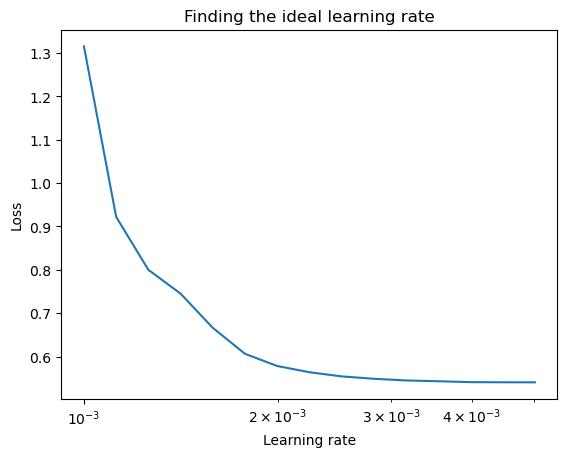

In [21]:
# Plots the learning rate decay curve.
lrs = 1e-3 * (10**(np.arange(len(search_lr_history.history["loss"]))/20))
plt.semilogx(lrs, search_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [22]:
# Replicates the model with the ideal Learning Rate.
tf.random.set_seed(0)

# Initialises the model. 
ann_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train[0].shape)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(len(class_labels), activation = "softmax")
])

# Adding the loss function, optimizer and the metrics which used for evaluation of result.
ann_4.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Fitting the model and storing the history of this training simulation.
ideal_lr_history = ann_4.fit(
    X_train_norm, 
    tf.one_hot(y_train, depth = len(class_labels)), 
    epochs = 40,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 5)],
    validation_data = (X_test_norm, tf.one_hot(y_test, depth = len(class_labels))),
    verbose = 1
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4530 - loss: 1.4873 - val_accuracy: 0.7424 - val_loss: 0.8696
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7624 - loss: 0.7982 - val_accuracy: 0.7751 - val_loss: 0.6908
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7898 - loss: 0.6477 - val_accuracy: 0.7863 - val_loss: 0.6350
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8023 - loss: 0.5888 - val_accuracy: 0.7922 - val_loss: 0.5997
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8115 - loss: 0.5568 - val_accuracy: 0.7987 - val_loss: 0.5828
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.8176 - loss: 0.5387 - val_accuracy: 0.8020 - val_loss: 0.5738
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - accuracy: 0.8209 - loss: 0.5271 - val_accuracy: 0.8030 - val_loss: 0.5681
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8241 - loss: 0.51

<Axes: title={'center': "Best Learning Rate's Curves"}>

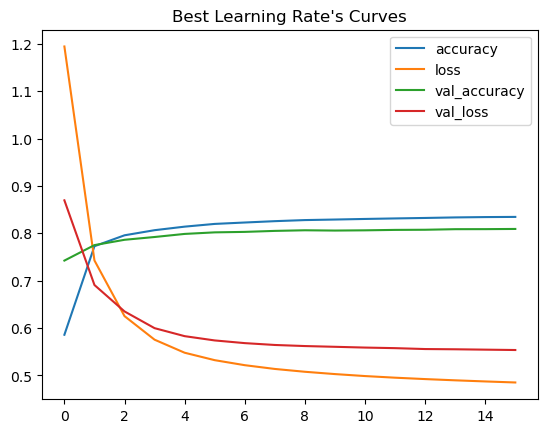

In [23]:
# Plots the best learning rate's curves.
pd.DataFrame(ideal_lr_history.history).plot(title = "Best Learning Rate's Curves")

In [24]:
# Creates a function for customized confusion matrix.

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix.
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Creates the confustion matrix.
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Adding titles (labels) on  axes.
  ax.set(title = "Confusion Matrix",
         xlabel = "Predicted label",
         ylabel = "True label",
         xticks = np.arange(n_classes), # create enough axis slots for each class
         yticks = np.arange(n_classes),
         xticklabels = labels, # axes will labeled with class names (if they exist) or ints
         yticklabels = labels)

  # Makes x-axis labels appear on bottom.
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Seting the threshold for different colors.
  threshold = (cm.max() + cm.min()) / 2.

  # Plots the text on each cell.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color = "white" if cm[i, j] > threshold else "black",
             size = text_size)

In [25]:
# Makes predictions with the most recent model.
y_pred = ann_4.predict(X_test_norm)

# Views the first 5 predictions.
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


array([[4.5306029e-04, 7.3342089e-11, 5.7632735e-07, 1.1815548e-04,
        3.7515244e-07, 4.7266281e-01, 3.0951563e-04, 6.2868029e-02,
        2.1399694e-02, 4.4218785e-01],
       [7.8848779e-04, 1.1195907e-06, 6.5083325e-01, 3.4389479e-05,
        2.8112602e-01, 4.4445787e-18, 6.7214668e-02, 0.0000000e+00,
        1.9903473e-06, 1.1758138e-28],
       [5.1294180e-04, 9.9778253e-01, 1.4652173e-03, 1.8442245e-04,
        2.0426314e-05, 5.2439142e-12, 3.4530975e-05, 1.5215814e-23,
        4.5200063e-10, 5.2540124e-17],
       [1.3649666e-03, 9.9467659e-01, 2.3346872e-03, 1.3640429e-03,
        1.0665968e-04, 1.6494420e-09, 1.5292785e-04, 7.8170429e-18,
        3.3857990e-08, 2.9419910e-13],
       [1.2743533e-01, 1.1464116e-05, 1.6765474e-01, 1.7722998e-02,
        7.7121884e-02, 5.2567090e-10, 6.0754645e-01, 1.0250489e-31,
        2.5071080e-03, 1.9450091e-15]], dtype=float32)

In [26]:
# Gets max number from each output which representes the predicted class from the model based on each input observation.
y_pred = y_pred.argmax(axis = 1)
y_pred

array([5, 2, 1, ..., 8, 1, 5], dtype=int64)

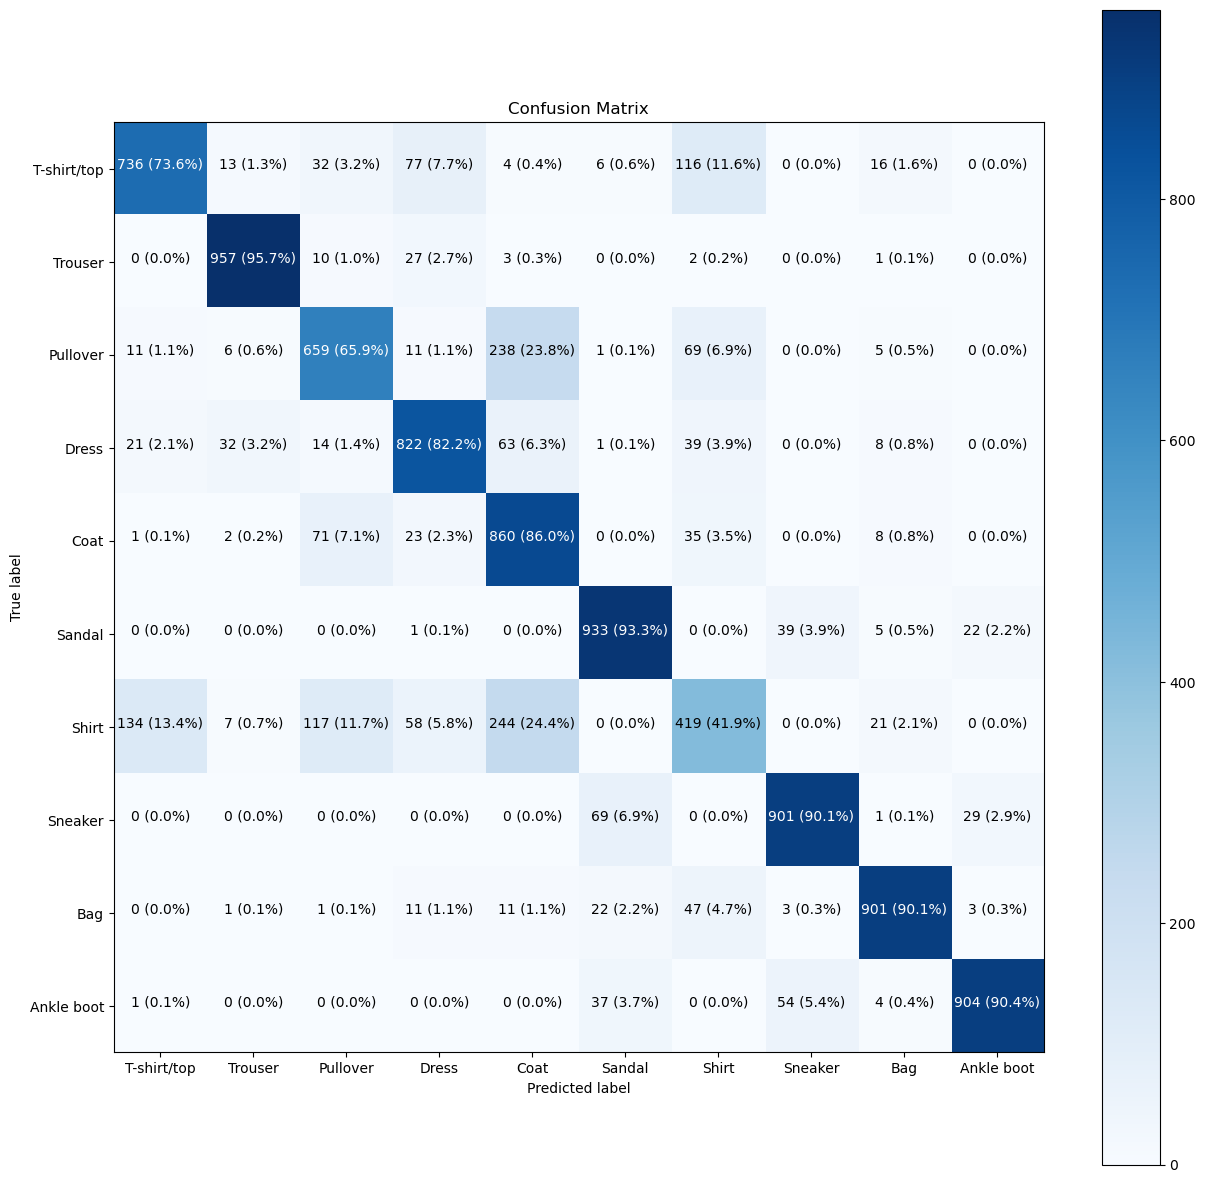

In [27]:
# Calls the function of confution matrix we made.
make_confusion_matrix(y_true = y_test, y_pred = y_pred, figsize = (15, 15), text_size = 10, classes = class_names)